<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/InverseLinkPredcition/blob/main/Plot_ILP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

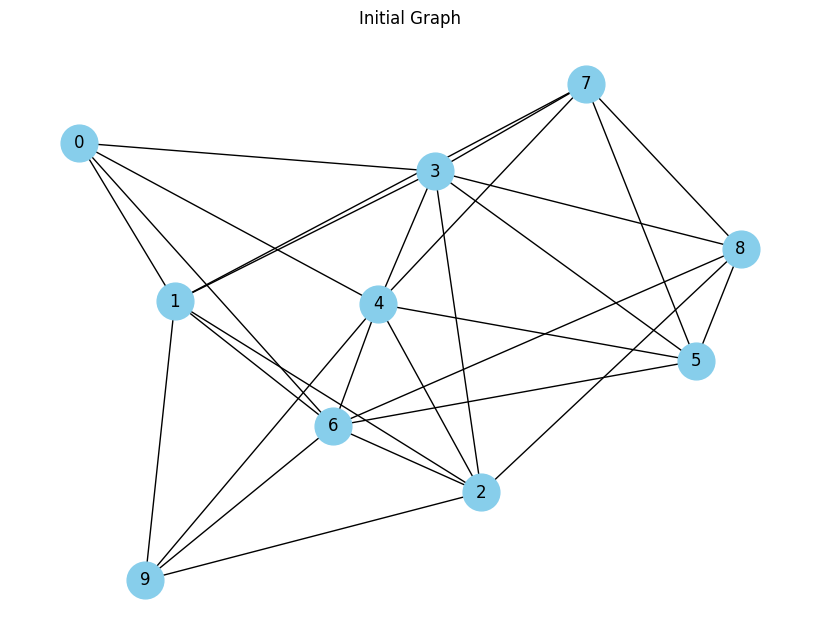

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple graph
G = nx.erdos_renyi_graph(10, 0.5)

# Plot the initial graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
plt.title("Initial Graph")
plt.show()


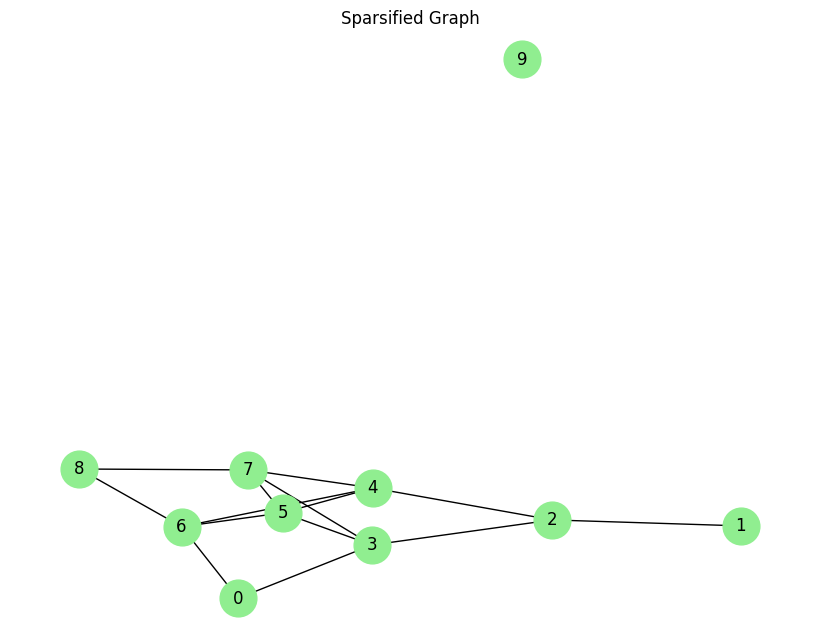

In [ ]:
# Mock GCN process to generate edge scores
def mock_gcn_score(edge):
    return np.random.random()  # Random score for simplicity

# Apply GCN and calculate ILP-GCN weights
alpha = 1
epsilon = 0.01
W_ILP_GCN = {(u, v): alpha / (mock_gcn_score((u, v)) + epsilon) for u, v in G.edges()}

# Dual-weight analysis (simplified, assuming initial weights are all 1)
gamma = 0.5
W_final = {(u, v): gamma + (1 - gamma) * W_ILP_GCN[(u, v)] for u, v in G.edges()}

# Simplified modularity optimization to sparsify the graph
# For demonstration, remove edges with final weights below a threshold
threshold = np.median(list(W_final.values()))
edges_to_remove = [e for e, w in W_final.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Plot the sparsified graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k')
plt.title("Sparsified Graph")
plt.show()


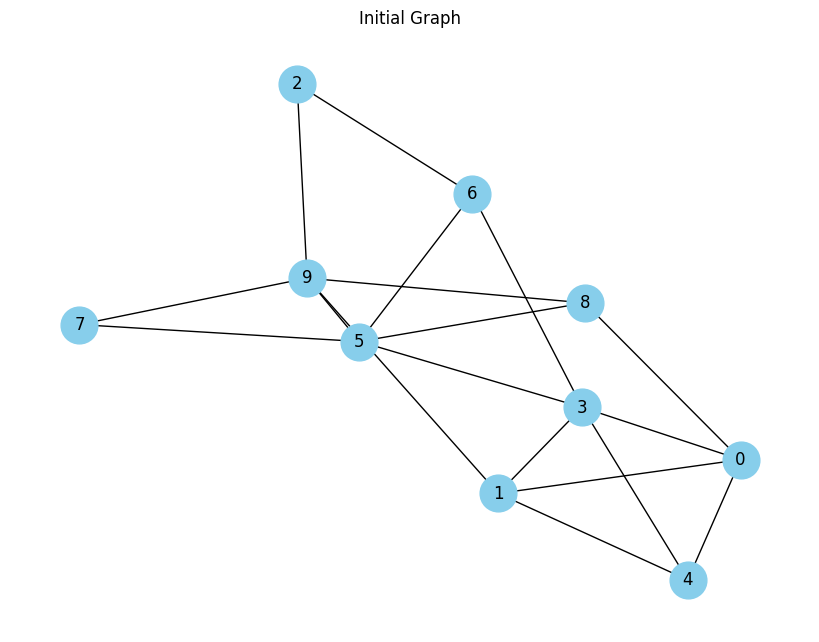

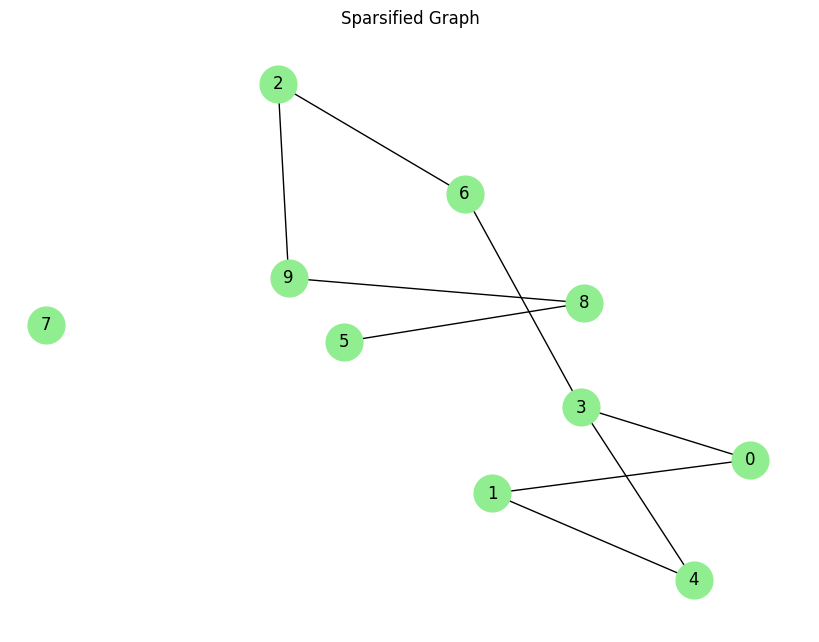

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple graph
G = nx.erdos_renyi_graph(10, 0.5)
# Compute positions once for all plots
pos = nx.spring_layout(G)

# Plot the initial graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
plt.title("Initial Graph")
plt.show()

# Mock GCN process to generate edge scores
def mock_gcn_score(edge):
    return np.random.random()  # Random score for simplicity

# Apply GCN and calculate ILP-GCN weights
alpha = 1
epsilon = 0.01
W_ILP_GCN = {(u, v): alpha / (mock_gcn_score((u, v)) + epsilon) for u, v in G.edges()}

# Dual-weight analysis (simplified, assuming initial weights are all 1)
gamma = 0.5
W_final = {(u, v): gamma + (1 - gamma) * W_ILP_GCN[(u, v)] for u, v in G.edges()}

# Simplified modularity optimization to sparsify the graph
# For demonstration, remove edges with final weights below a threshold
threshold = np.median(list(W_final.values()))
edges_to_remove = [e for e, w in W_final.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Plot the sparsified graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k')
plt.title("Sparsified Graph")
plt.show()


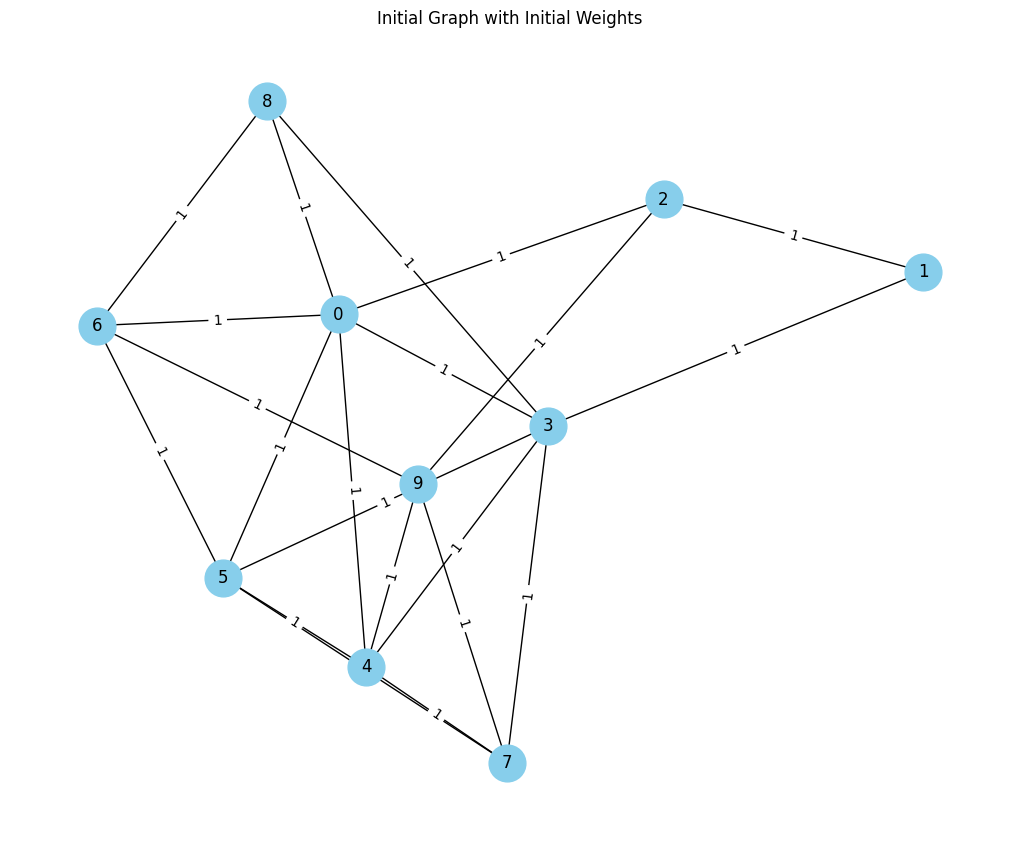

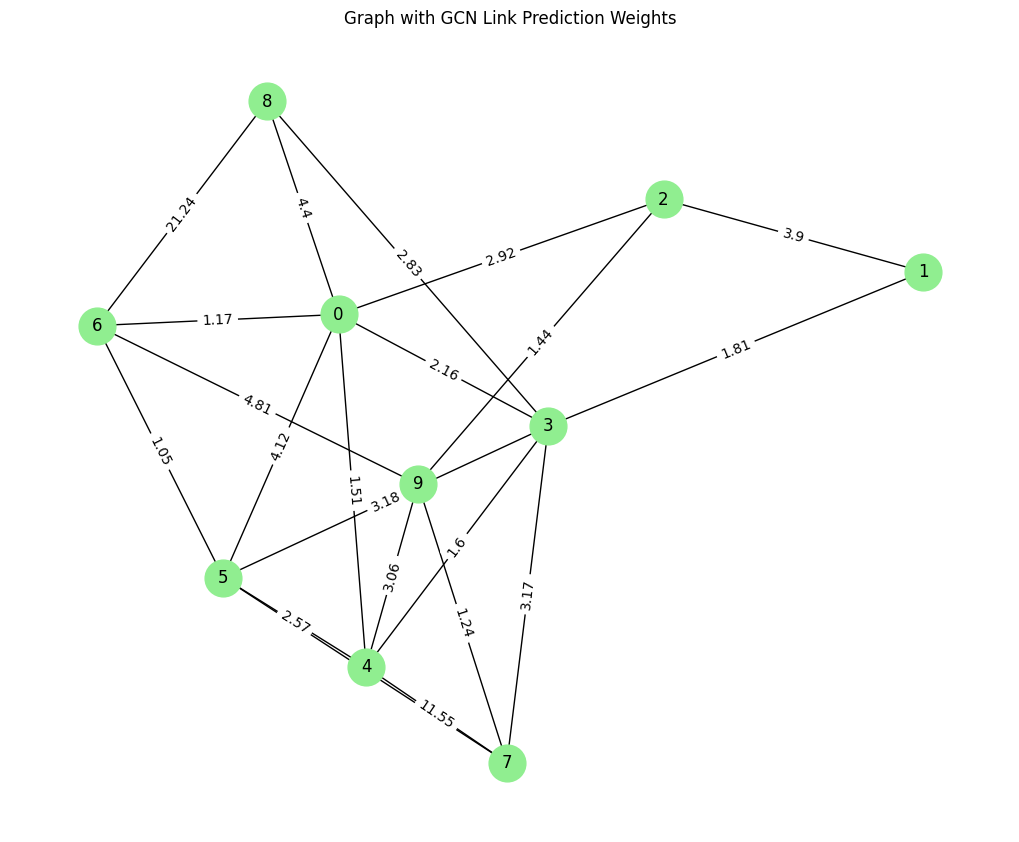

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple graph
G = nx.erdos_renyi_graph(10, 0.5)
# Assign initial weights to each edge
for u, v in G.edges():
    G[u][v]['weight'] = 1  # Initial weight

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Plot the initial graph with initial weights
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Initial Graph with Initial Weights")
plt.show()

# Mock GCN process to generate edge scores and update weights
def mock_gcn_score(edge):
    return np.random.random()  # Random score for simplicity

alpha = 1
epsilon = 0.01
# Calculate ILP-GCN weights and update the graph's edge data
for u, v in G.edges():
    G[u][v]['weight'] = alpha / (mock_gcn_score((u, v)) + epsilon)  # Update with GCN-derived weight

# Plot the graph with GCN-derived weights before sparsification
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k')
edge_labels = nx.get_edge_attributes(G, 'weight')
# For clarity in visualization, rounding weights to 2 decimal places
edge_labels = {e: round(w, 2) for e, w in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph with GCN Link Prediction Weights")
plt.show()


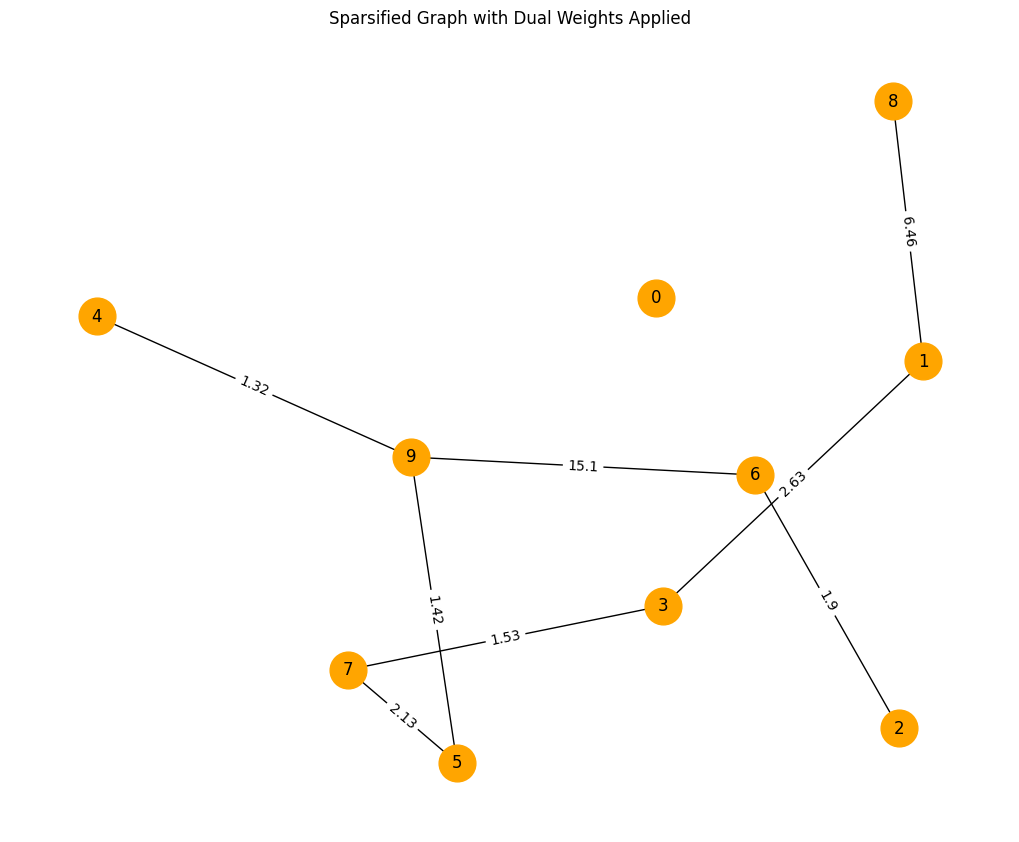

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple graph
G = nx.erdos_renyi_graph(10, 0.5)
# Assign initial weights to each edge
for u, v in G.edges():
    G[u][v]['weight'] = 1  # Initial weight

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Mock GCN process to generate edge scores
def mock_gcn_score(edge):
    return np.random.random()  # Random score for simplicity

alpha = 1
epsilon = 0.01

# Apply GCN and calculate ILP-GCN weights, update the graph's edge data
for u, v in G.edges():
    gcn_weight = alpha / (mock_gcn_score((u, v)) + epsilon)
    G[u][v]['gcn_weight'] = gcn_weight  # Store GCN-derived weight separately

# Dual-weight analysis (assuming initial weights are all 1)
gamma = 0.5
W_final = {}
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v]['gcn_weight']
    dual_weight = gamma * initial_weight + (1 - gamma) * gcn_weight
    W_final[(u, v)] = dual_weight
    G[u][v]['weight'] = dual_weight  # Update with dual weight

# Apply a threshold to remove edges based on dual weights
threshold = np.median(list(W_final.values()))
edges_to_remove = [e for e, w in W_final.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Plot the final, sparsified graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=700, edge_color='k')
edge_labels = nx.get_edge_attributes(G, 'weight')
# For clarity in visualization, rounding weights to 2 decimal places
edge_labels = {e: round(w, 2) for e, w in edge_labels.items() if w >= threshold}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Sparsified Graph with Dual Weights Applied")
plt.show()


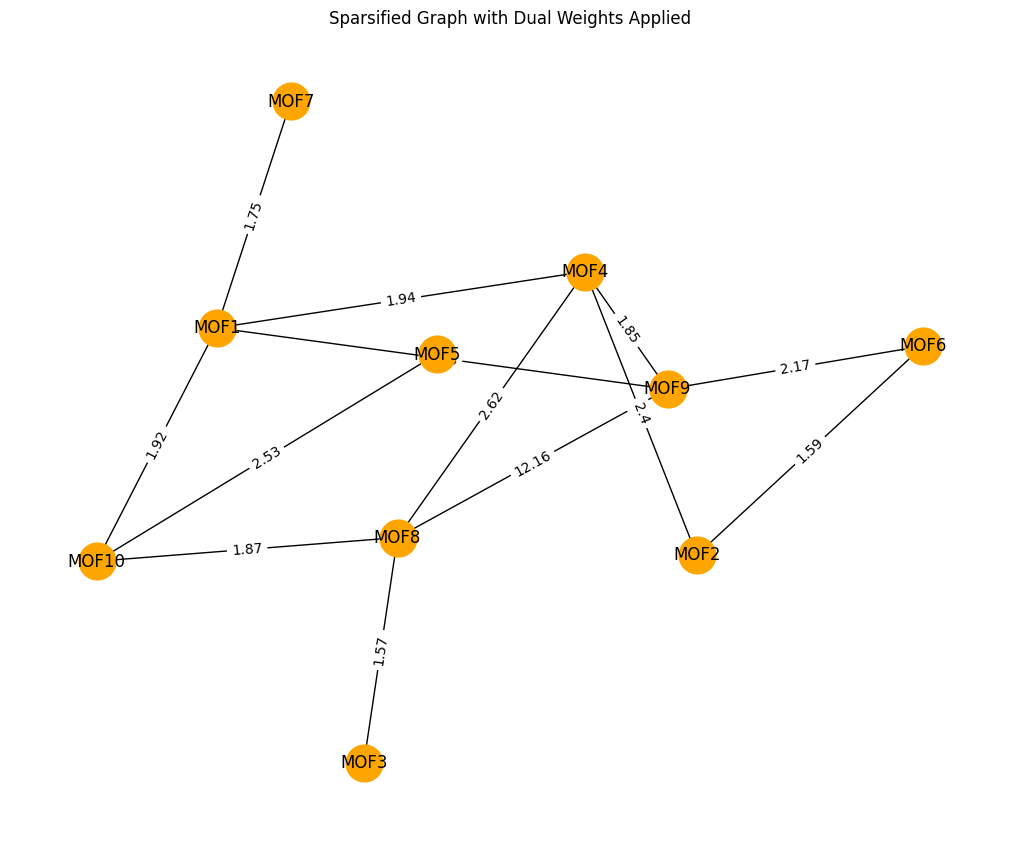

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a simple graph
G = nx.erdos_renyi_graph(10, 0.5)
# Renaming nodes to "MOF1" to "MOF10"
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Mock GCN process to generate edge scores
def mock_gcn_score(edge):
    return np.random.random()  # Random score for simplicity

alpha = 1
epsilon = 0.01

# Apply GCN and calculate ILP-GCN weights, update the graph's edge data
for u, v in G.edges():
    gcn_weight = alpha / (mock_gcn_score((u, v)) + epsilon)
    G[u][v]['gcn_weight'] = gcn_weight  # Store GCN-derived weight separately

# Dual-weight analysis (assuming initial weights are all 1)
gamma = 0.5
W_final = {}
for u, v in G.edges():
    initial_weight = 1  # Assume all initial weights are 1
    gcn_weight = G[u][v]['gcn_weight']
    dual_weight = gamma * initial_weight + (1 - gamma) * gcn_weight
    W_final[(u, v)] = dual_weight
    G[u][v]['weight'] = dual_weight  # Update with dual weight

# Apply a threshold to remove edges based on dual weights
threshold = np.median(list(W_final.values()))
edges_to_remove = [e for e, w in W_final.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Plot the final, sparsified graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=700, edge_color='k')
edge_labels = nx.get_edge_attributes(G, 'weight')
# For clarity in visualization, rounding weights to 2 decimal places
edge_labels = {e: round(w, 2) for e, w in edge_labels.items() if w >= threshold}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Sparsified Graph with Dual Weights Applied")
plt.show()


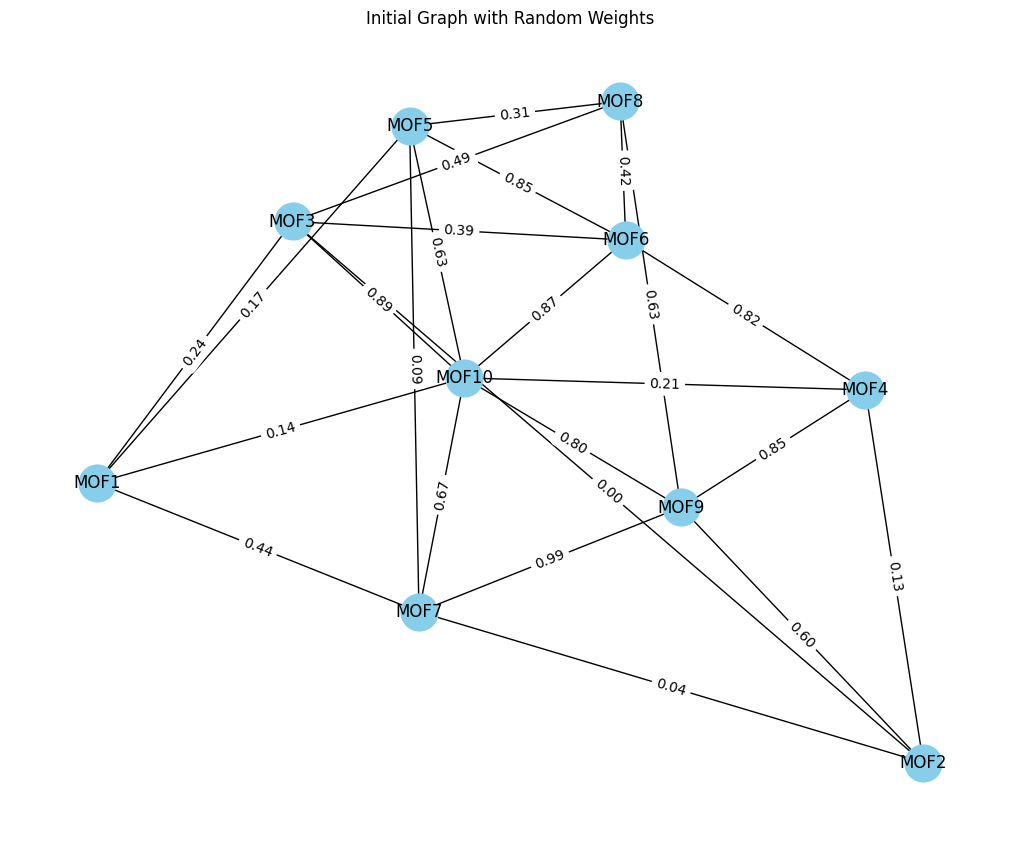

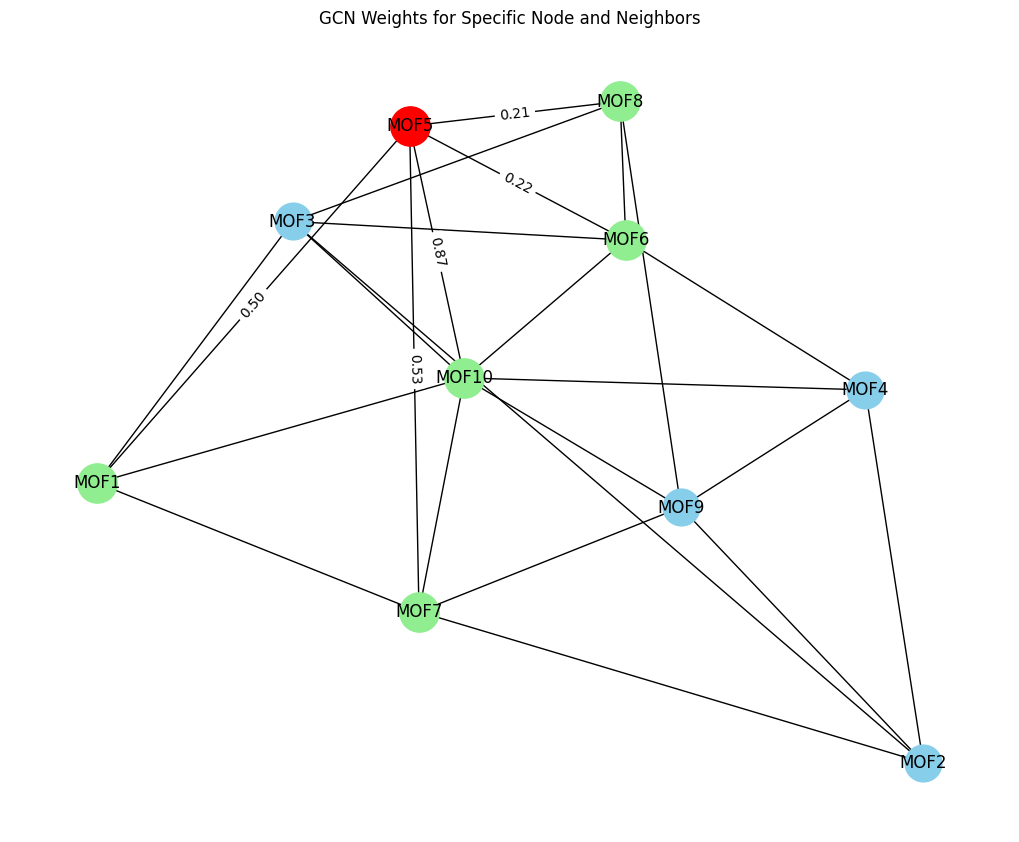

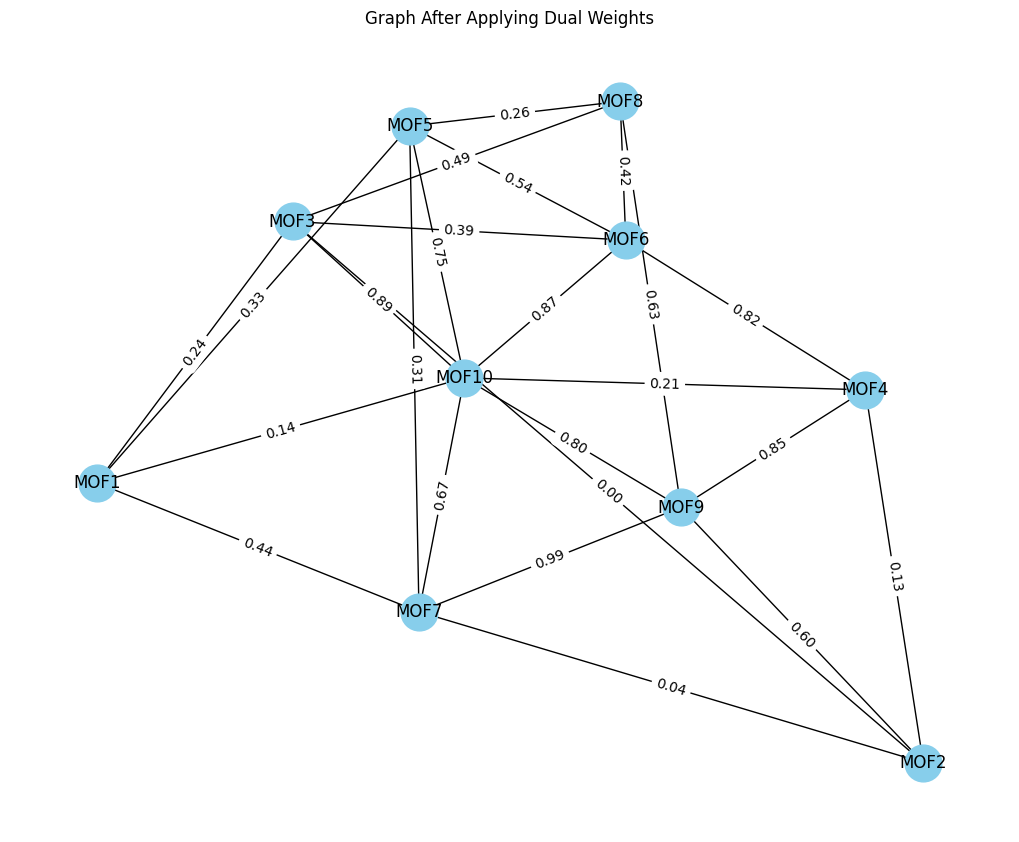

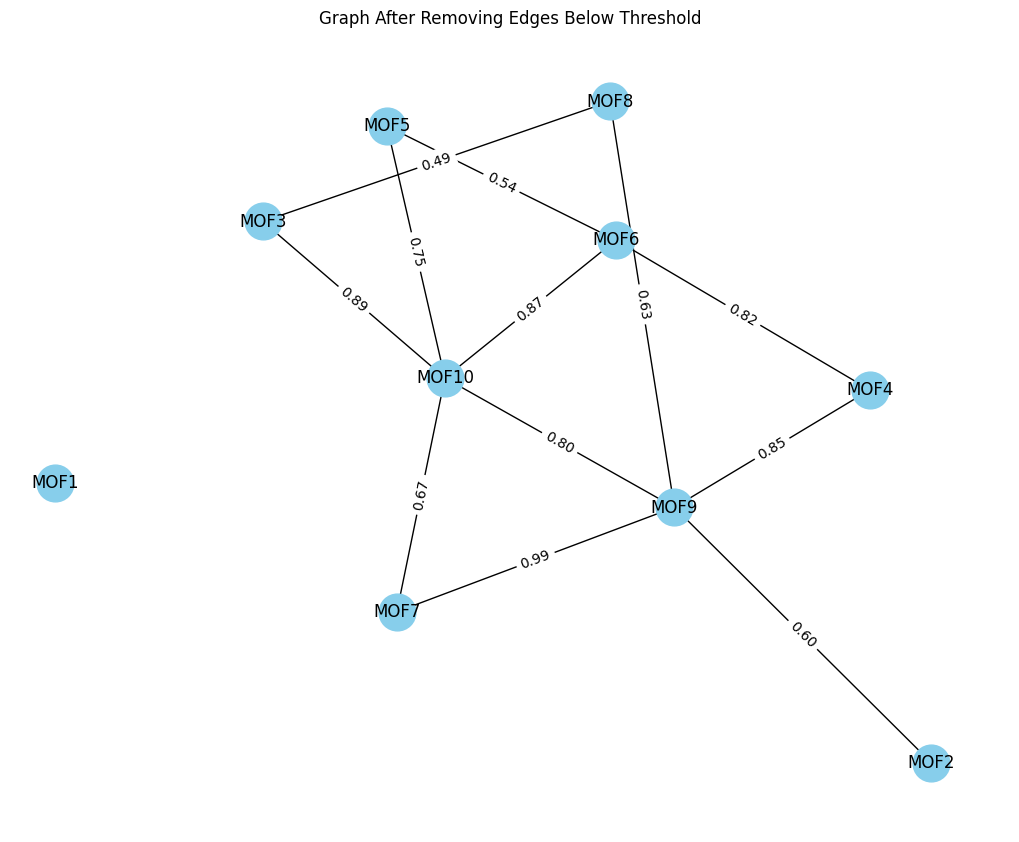

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the graph
def plot_graph(G, pos, edge_weights, title, highlight=None, removed_edges=None):
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', width=1)

    # Highlight specific node and its neighbors
    if highlight:
        nx.draw_networkx_nodes(G, pos, nodelist=[highlight], node_size=800, node_color='red')
        neighbors = list(G.neighbors(highlight))
        nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=800, node_color='lightgreen')

    # Filter edge labels to not include removed edges
    if removed_edges:
        edge_weights = {e: w for e, w in edge_weights.items() if e not in removed_edges}

    # Draw edge labels based on weights
    edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate a simple graph and assign random initial weights
G = nx.erdos_renyi_graph(10, 0.5)
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Plot 1: Initial graph with random initial weights
initial_weights = nx.get_edge_attributes(G, 'weight')
plot_graph(G, pos, initial_weights, "Initial Graph with Random Weights")

# Mock GCN process to generate edge scores for a specific node and its neighbors
specific_node = 'MOF5'
def mock_gcn_score():
    return np.random.rand()

# Apply mock GCN scores for edges connected to the specific node
for neighbor in G.neighbors(specific_node):
    G[specific_node][neighbor]['gcn_weight'] = mock_gcn_score()

# Plot 2: Highlight specific node and its neighbors with GCN-derived weights
gcn_weights = {(specific_node, neighbor): G[specific_node][neighbor]['gcn_weight'] for neighbor in G.neighbors(specific_node)}
plot_graph(G, pos, gcn_weights, "GCN Weights for Specific Node and Neighbors", highlight=specific_node)

# Apply dual weighting to all edges
gamma = 0.5
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v].get('gcn_weight', initial_weight)  # Use initial weight if GCN weight not assigned
    G[u][v]['dual_weight'] = gamma * initial_weight + (1 - gamma) * gcn_weight

# Plot 3: After applying dual weighting
dual_weights = nx.get_edge_attributes(G, 'dual_weight')
plot_graph(G, pos, dual_weights, "Graph After Applying Dual Weights")

# Remove edges below specific threshold (median for simplicity)
threshold = np.median(list(dual_weights.values()))
edges_to_remove = [e for e, w in dual_weights.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

plot_graph(G, pos, dual_weights, "Graph After Removing Edges Below Threshold", removed_edges=edges_to_remove)


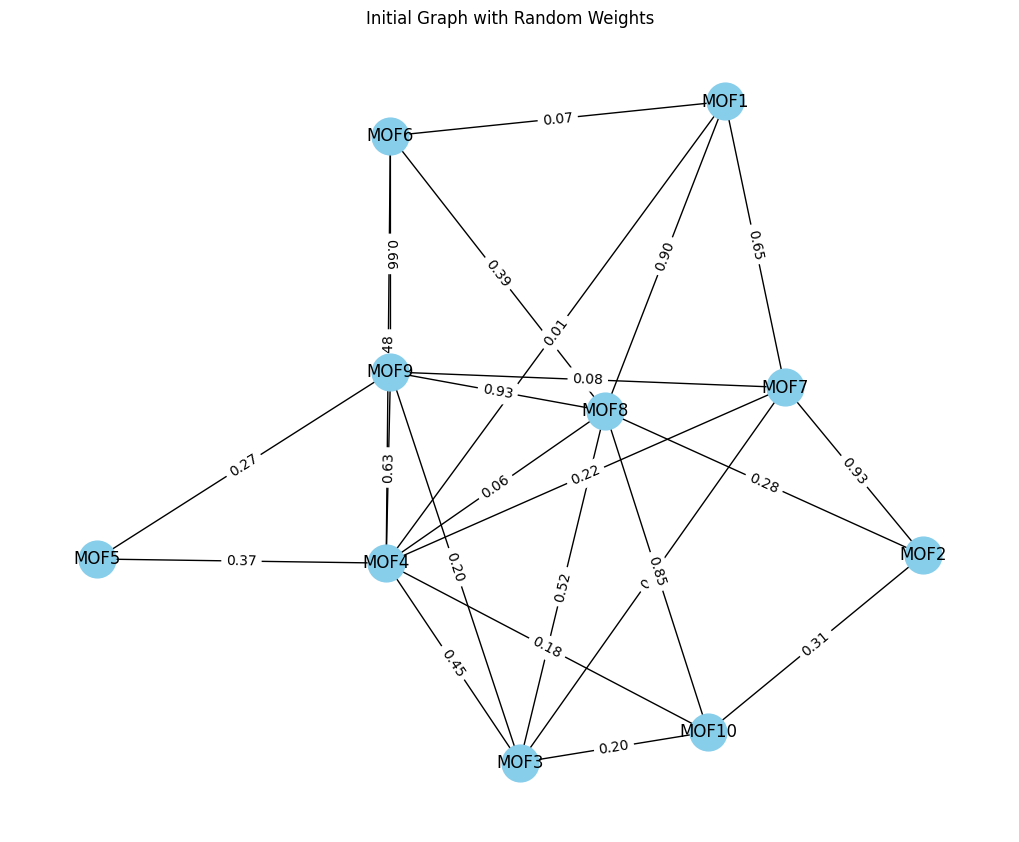

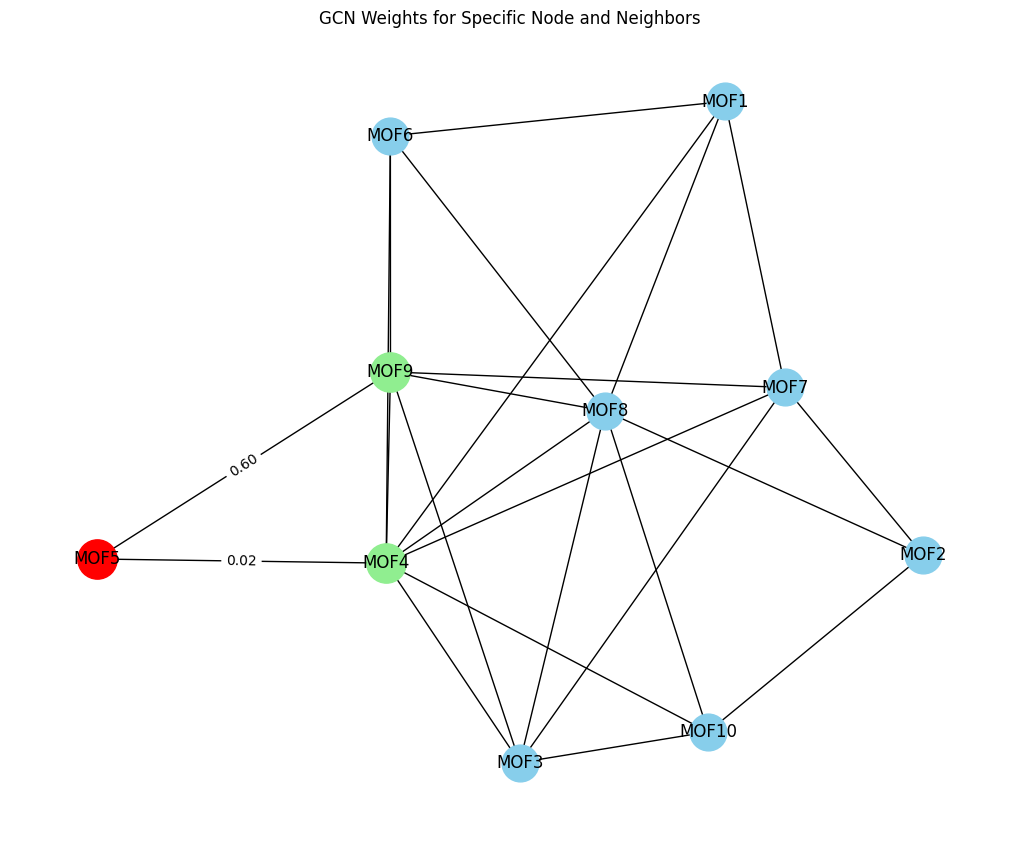

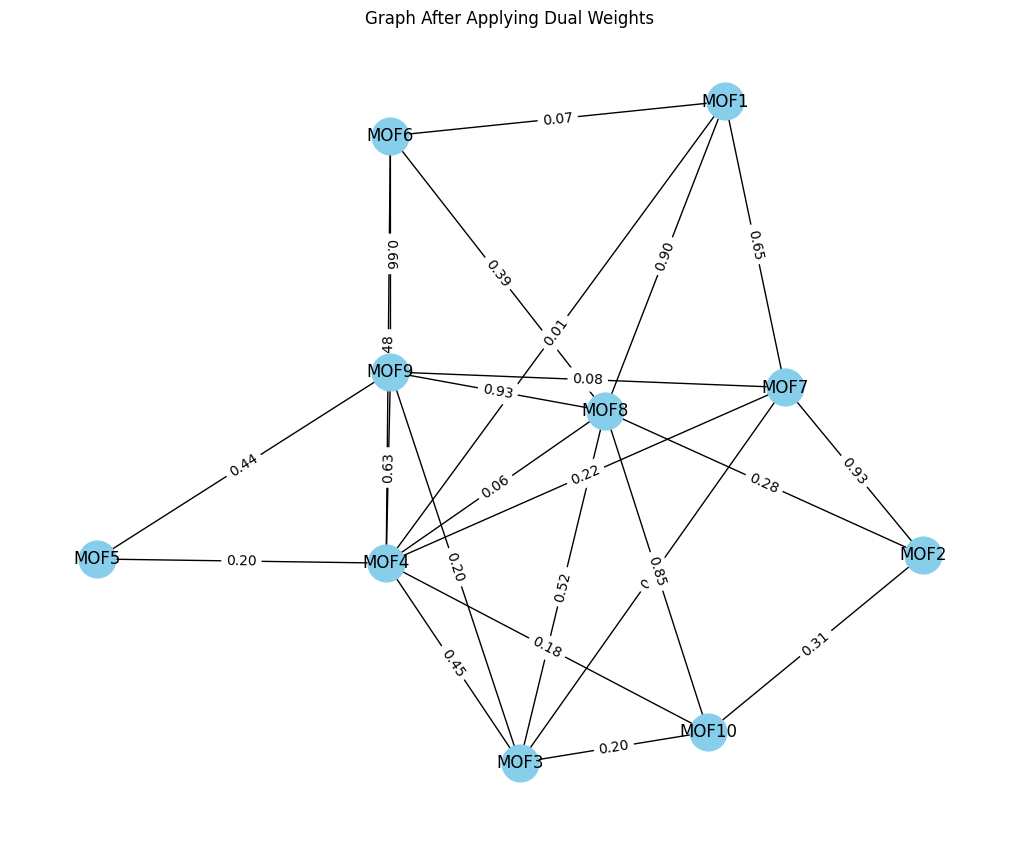

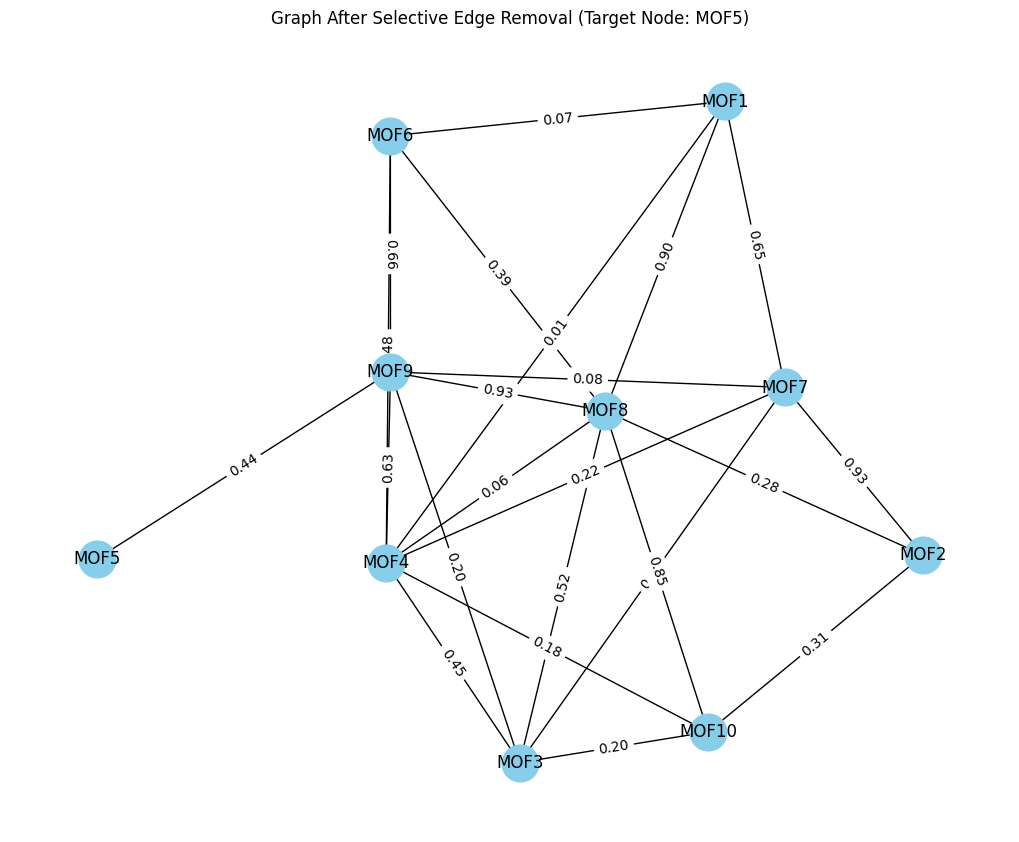

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the graph
def plot_graph(G, pos, edge_weights, title, highlight=None, removed_edges=None):
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', width=1)

    # Highlight specific node and its neighbors
    if highlight:
        nx.draw_networkx_nodes(G, pos, nodelist=[highlight], node_size=800, node_color='red')
        neighbors = list(G.neighbors(highlight))
        nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=800, node_color='lightgreen')

    # Filter edge labels to not include removed edges
    if removed_edges:
        edge_weights = {e: w for e, w in edge_weights.items() if e not in removed_edges}

    # Draw edge labels based on weights
    edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate a simple graph and assign random initial weights
G = nx.erdos_renyi_graph(10, 0.5)
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Plot 1: Initial graph with random initial weights
initial_weights = nx.get_edge_attributes(G, 'weight')
plot_graph(G, pos, initial_weights, "Initial Graph with Random Weights")

# Mock GCN process to generate edge scores for a specific node and its neighbors
specific_node = 'MOF5'
def mock_gcn_score():
    return np.random.rand()

# Apply mock GCN scores for edges connected to the specific node
for neighbor in G.neighbors(specific_node):
    G[specific_node][neighbor]['gcn_weight'] = mock_gcn_score()

# Plot 2: Highlight specific node and its neighbors with GCN-derived weights
gcn_weights = {(specific_node, neighbor): G[specific_node][neighbor]['gcn_weight'] for neighbor in G.neighbors(specific_node)}
plot_graph(G, pos, gcn_weights, "GCN Weights for Specific Node and Neighbors", highlight=specific_node)

# Apply dual weighting to all edges
gamma = 0.5
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v].get('gcn_weight', initial_weight)  # Use initial weight if GCN weight not assigned
    G[u][v]['dual_weight'] = gamma * initial_weight + (1 - gamma) * gcn_weight

# Plot 3: After applying dual weighting
dual_weights = nx.get_edge_attributes(G, 'dual_weight')
plot_graph(G, pos, dual_weights, "Graph After Applying Dual Weights")

# Specify the node for ILP-based edge removal
target_node = specific_node

# Calculate the median of dual weights for edges connected to the target node
target_edges_dual_weights = {e: w for e, w in dual_weights.items() if e[0] == target_node or e[1] == target_node}
threshold = np.median(list(target_edges_dual_weights.values()))

# Remove edges connected to the target node below the calculated threshold
edges_to_remove = [e for e, w in target_edges_dual_weights.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Update for plotting: Display the graph after selectively removing edges
plot_graph(G, pos, dual_weights, "Graph After Selective Edge Removal (Target Node: MOF5)", removed_edges=edges_to_remove)


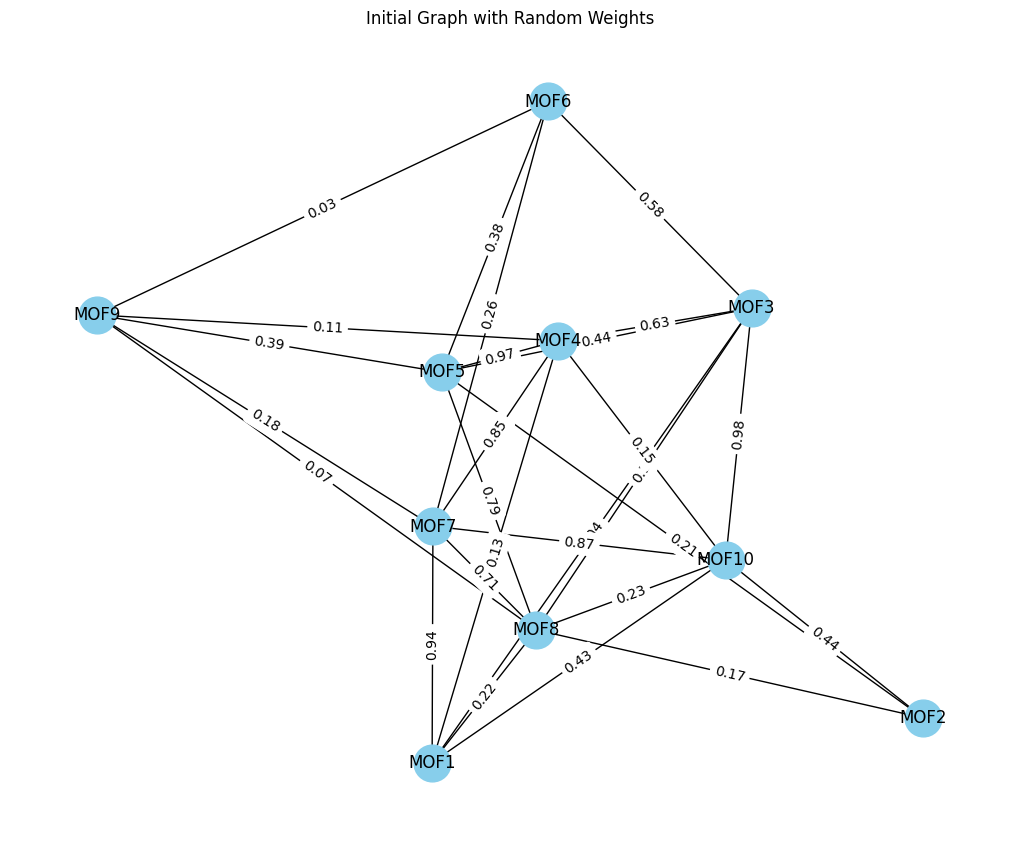

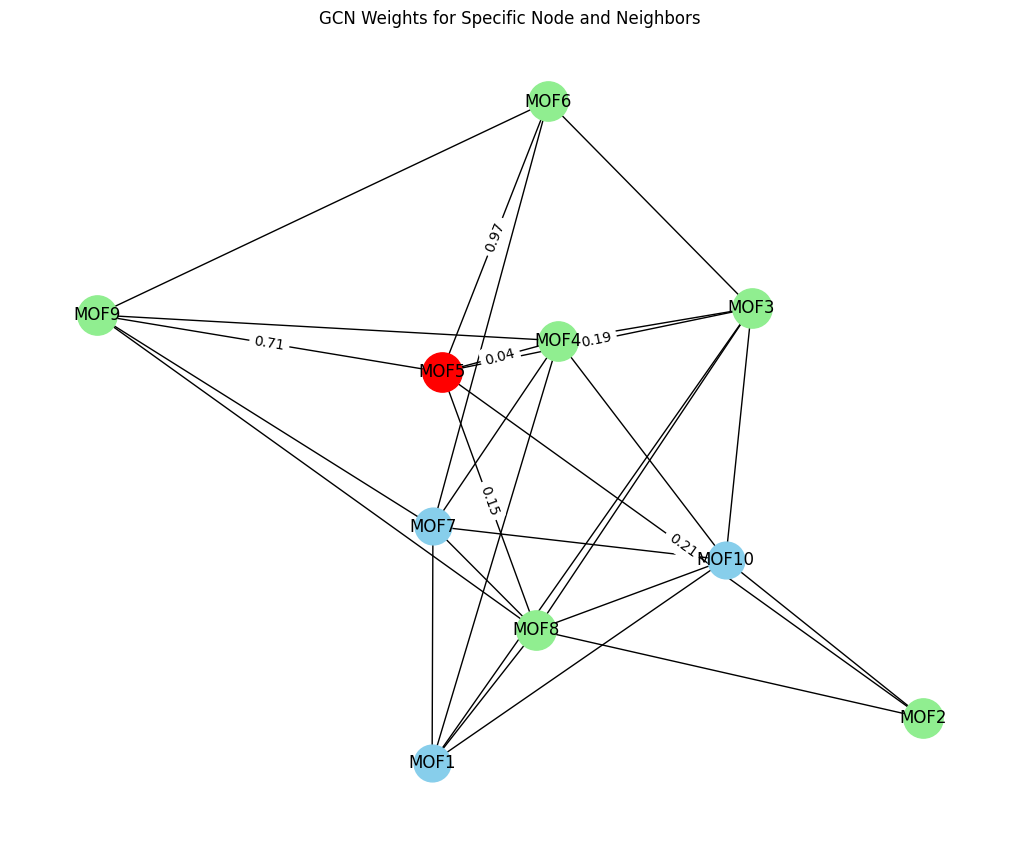

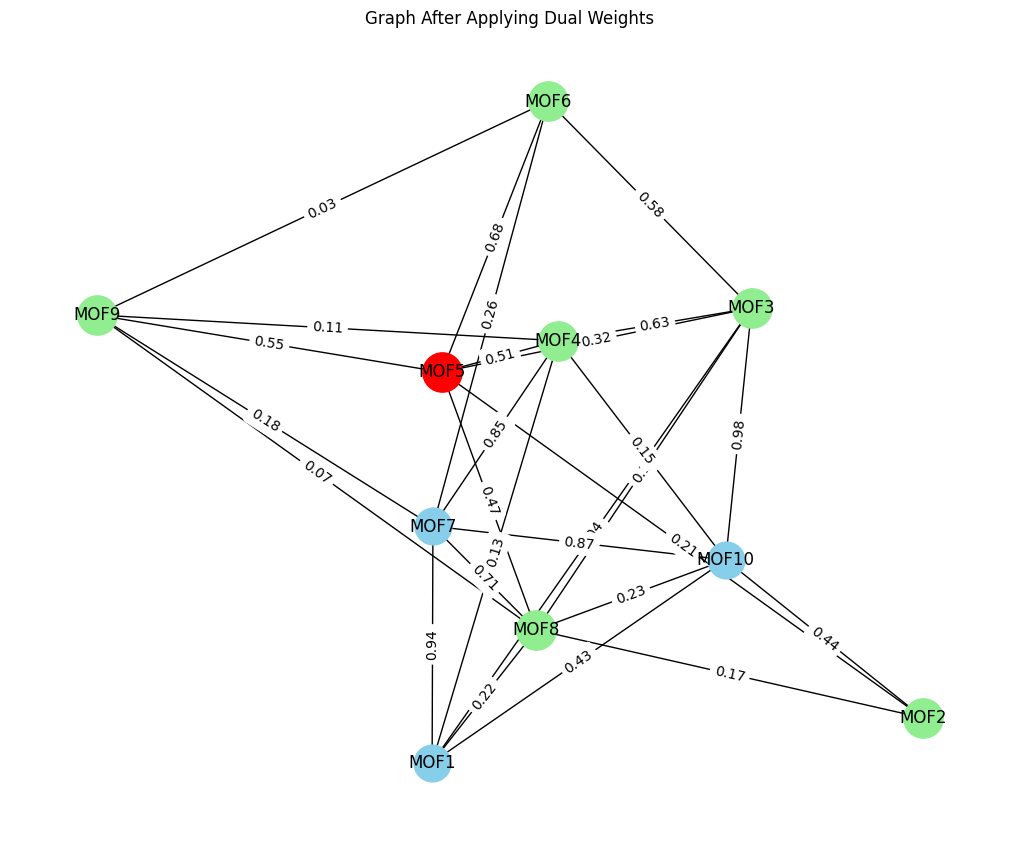

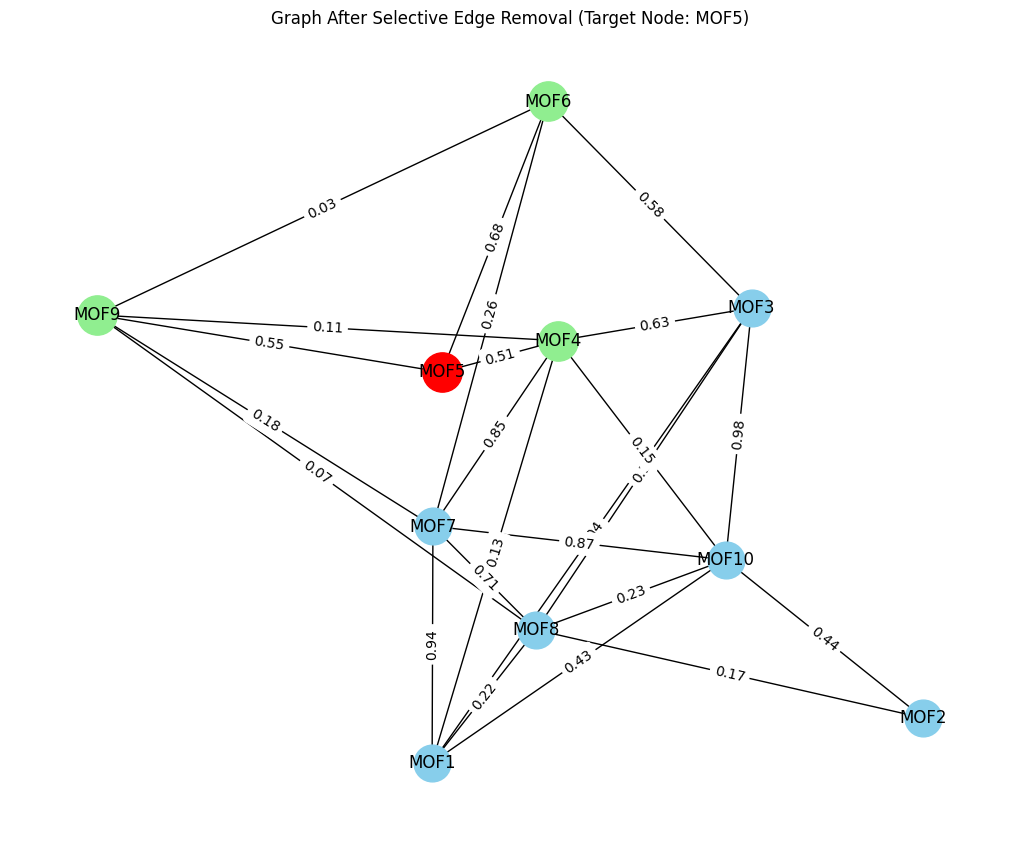

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the graph
def plot_graph(G, pos, edge_weights, title, highlight=None, removed_edges=None):
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', width=1)

    # Highlight specific node and its neighbors
    if highlight:
        nx.draw_networkx_nodes(G, pos, nodelist=[highlight], node_size=800, node_color='red')
        neighbors = list(G.neighbors(highlight))
        nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=800, node_color='lightgreen')

    # Filter edge labels to not include removed edges
    if removed_edges:
        edge_weights = {e: w for e, w in edge_weights.items() if e not in removed_edges}

    # Draw edge labels based on weights
    edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate a simple graph and assign random initial weights
G = nx.erdos_renyi_graph(10, 0.5)
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()

# Compute positions once for all plots
pos = nx.spring_layout(G)

# Initial plot
initial_weights = nx.get_edge_attributes(G, 'weight')
plot_graph(G, pos, initial_weights, "Initial Graph with Random Weights")

# Mock GCN process
specific_node = 'MOF5'
def mock_gcn_score():
    return np.random.rand()

for neighbor in G.neighbors(specific_node):
    G[specific_node][neighbor]['gcn_weight'] = mock_gcn_score()

# Highlight the specific node and its neighbors with GCN-derived weights
gcn_weights = {(specific_node, neighbor): G[specific_node][neighbor]['gcn_weight'] for neighbor in G.neighbors(specific_node)}
plot_graph(G, pos, gcn_weights, "GCN Weights for Specific Node and Neighbors", highlight=specific_node)

# Apply dual weighting to all edges
gamma = 0.5
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v].get('gcn_weight', initial_weight)
    G[u][v]['dual_weight'] = gamma * initial_weight + (1 - gamma) * gcn_weight

# After applying dual weighting
dual_weights = nx.get_edge_attributes(G, 'dual_weight')
plot_graph(G, pos, dual_weights, "Graph After Applying Dual Weights", highlight=specific_node)

# Specify the node for ILP-based edge removal
target_node = specific_node
target_edges_dual_weights = {e: w for e, w in dual_weights.items() if e[0] == target_node or e[1] == target_node}
threshold = np.median(list(target_edges_dual_weights.values()))

# Remove edges connected to the target node below the calculated threshold
edges_to_remove = [e for e, w in target_edges_dual_weights.items() if w < threshold]
G.remove_edges_from(edges_to_remove)

# Final visualization
plot_graph(G, pos, dual_weights, "Graph After Selective Edge Removal (Target Node: MOF5)", highlight=specific_node, removed_edges=edges_to_remove)


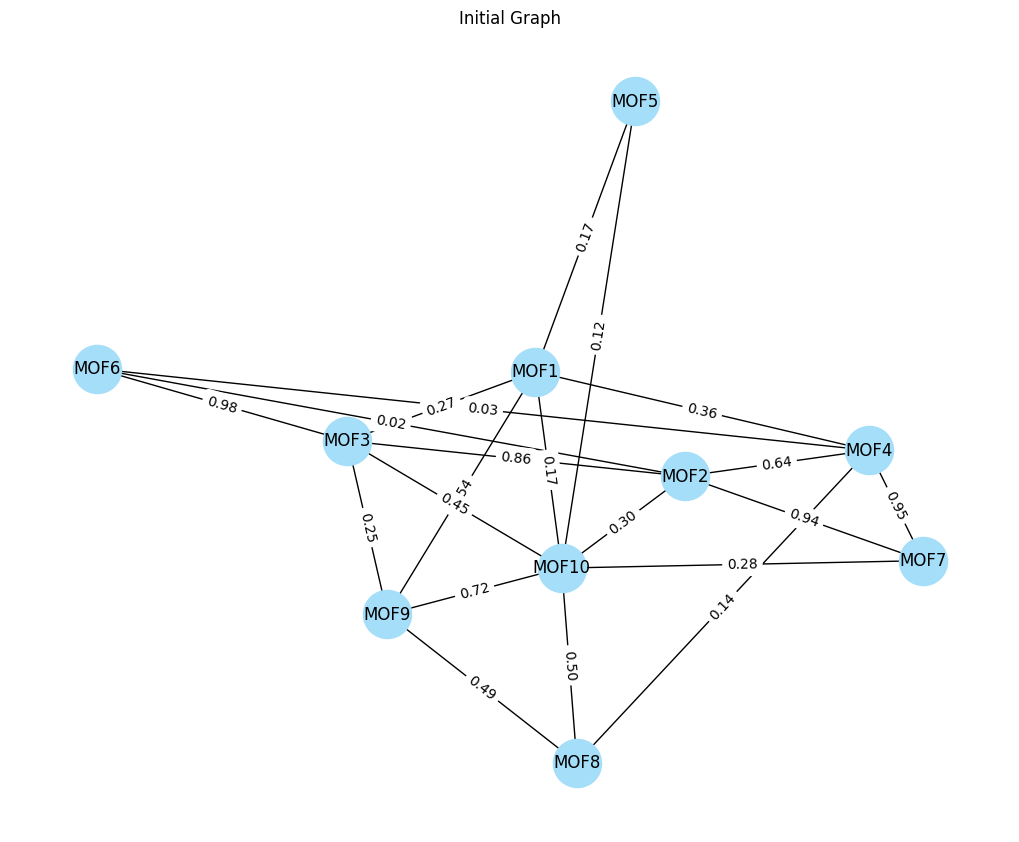

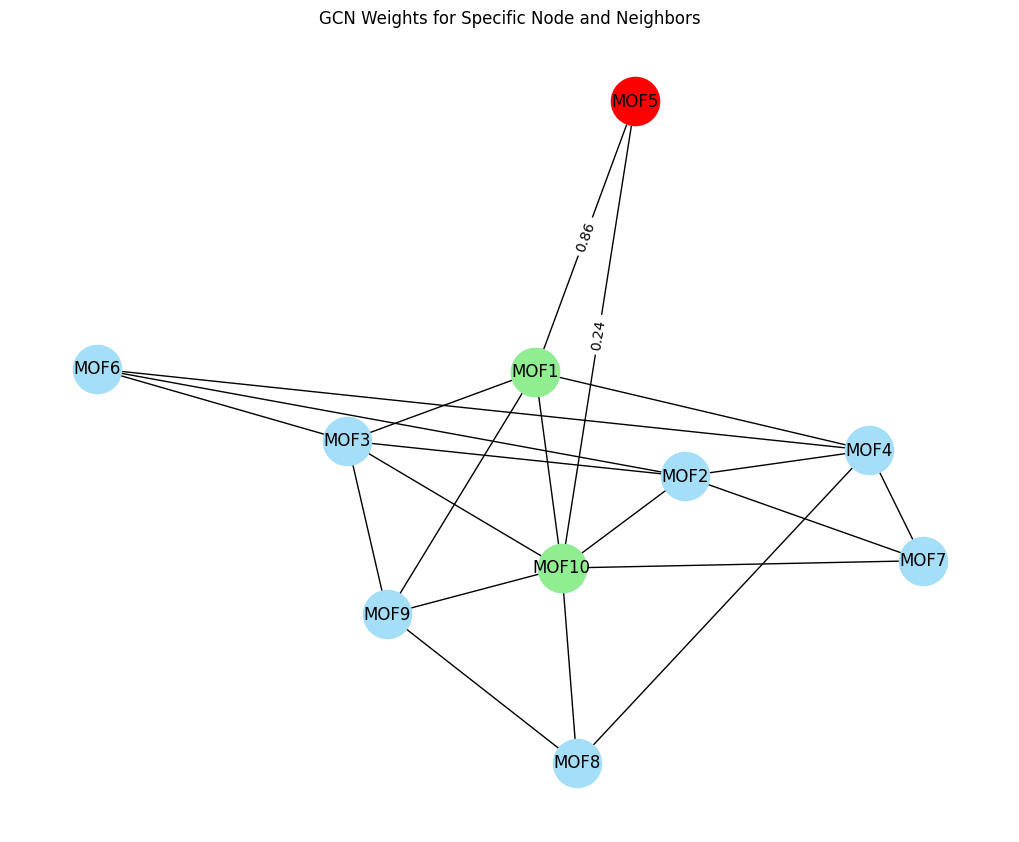

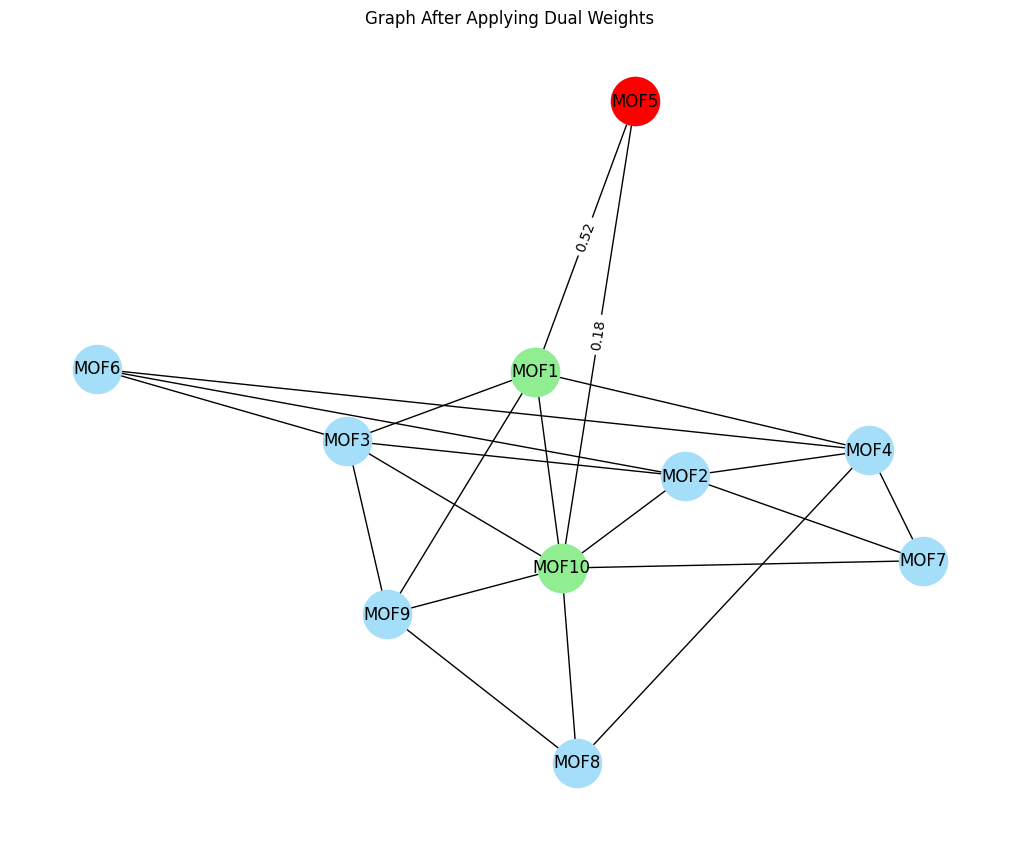

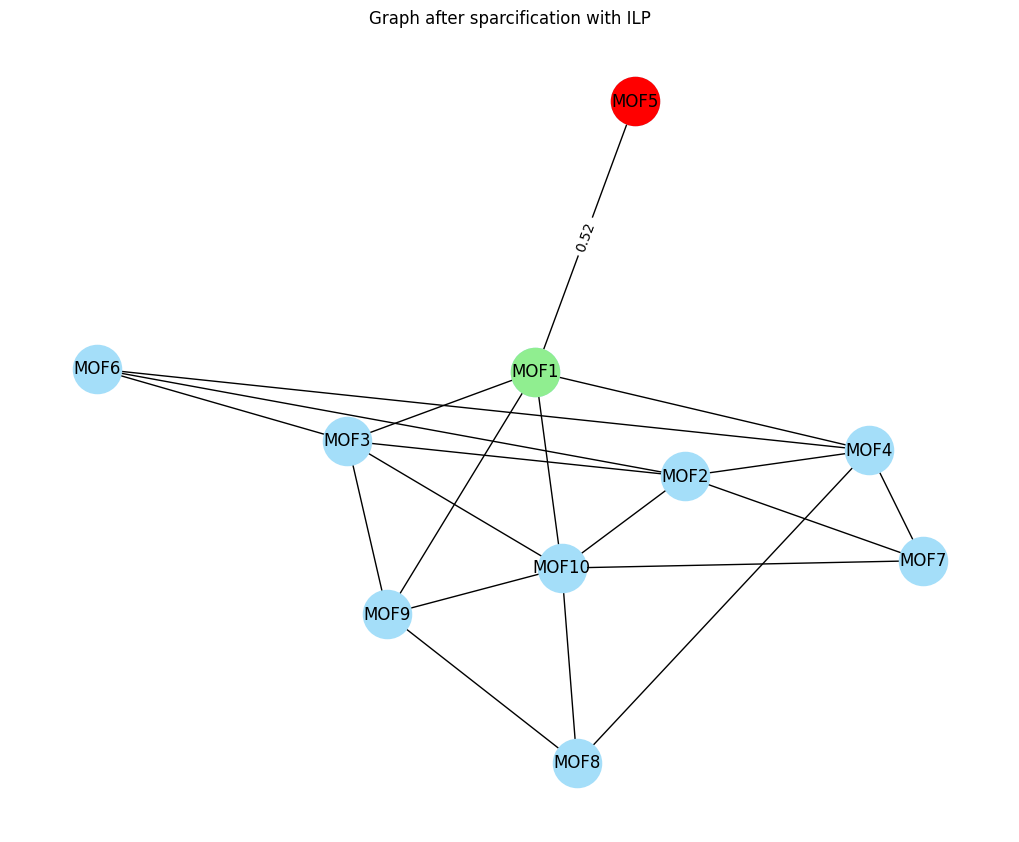

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the graph
def plot_graph(G, pos, edge_weights, title, highlight=None, removed_edges=None, display_edges=None):
    plt.figure(figsize=(10, 8))
    # Draw the base graph with nodes in ice cube color and increased node size
    nx.draw(G, pos, with_labels=True, node_color='#a4def9', node_size=1200, edge_color='k', width=1)

    # Highlight specific node in red and its neighbors in light green with increased node size
    if highlight:
        nx.draw_networkx_nodes(G, pos, nodelist=[highlight], node_size=1200, node_color='red')
        neighbors = list(G.neighbors(highlight))
        nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=1200, node_color='lightgreen')

    # If display_edges is specified, filter edge_labels accordingly
    if display_edges:
        edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items() if e in display_edges or (e[1], e[0]) in display_edges}
    else:
        edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items()}

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Initialize the graph, compute positions, and follow with the rest of your graph setup and plotting steps...


# Your existing graph setup and processing steps follow here...


# Initialize the graph and positions
G = nx.erdos_renyi_graph(10, 0.5, seed=42)
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()  # Initial random weights

pos = nx.spring_layout(G, seed=42)

# Initial graph plot
initial_weights = nx.get_edge_attributes(G, 'weight')
plot_graph(G, pos, initial_weights, "Initial Graph")

# Selected node and mock GCN weights application
specific_node = 'MOF5'
def mock_gcn_score():
    return np.random.rand()

for u, v in G.edges():
    if u == specific_node or v == specific_node:
        G[u][v]['gcn_weight'] = mock_gcn_score()

# Get edges for labeling connected to the specific node
selected_node_edges = [(u, v) for u, v in G.edges() if u == specific_node or v == specific_node]

# GCN weights plot
gcn_weights = {e: G.edges[e]['gcn_weight'] for e in selected_node_edges}
plot_graph(G, pos, gcn_weights, "GCN Weights for Specific Node and Neighbors", highlight=specific_node, display_edges=selected_node_edges)

# Apply dual weighting
gamma = 0.5
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v].get('gcn_weight', initial_weight)  # Use initial weight if no specific GCN weight assigned
    G[u][v]['dual_weight'] = gamma * initial_weight + (1 - gamma) * gcn_weight

# Dual weights plot
dual_weights = {e: G.edges[e]['dual_weight'] for e in G.edges()}
plot_graph(G, pos, dual_weights, "Graph After Applying Dual Weights", highlight=specific_node, display_edges=selected_node_edges)

# Edge removal based on threshold
threshold = np.median([G.edges[e]['dual_weight'] for e in selected_node_edges])
edges_to_remove = [e for e in selected_node_edges if G.edges[e]['dual_weight'] < threshold]
G.remove_edges_from(edges_to_remove)

# Update selected_node_edges to reflect the current graph state
selected_node_edges = [(u, v) for u, v in G.edges() if u == specific_node or v == specific_node]

# Final plot after selective edge removal
plot_graph(G, pos, dual_weights, "Graph after sparcification with ILP", highlight=specific_node, removed_edges=edges_to_remove, display_edges=selected_node_edges)


<ipython-input-50-01569f667954>:39: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, alpha=0.5, edge_color='grey',


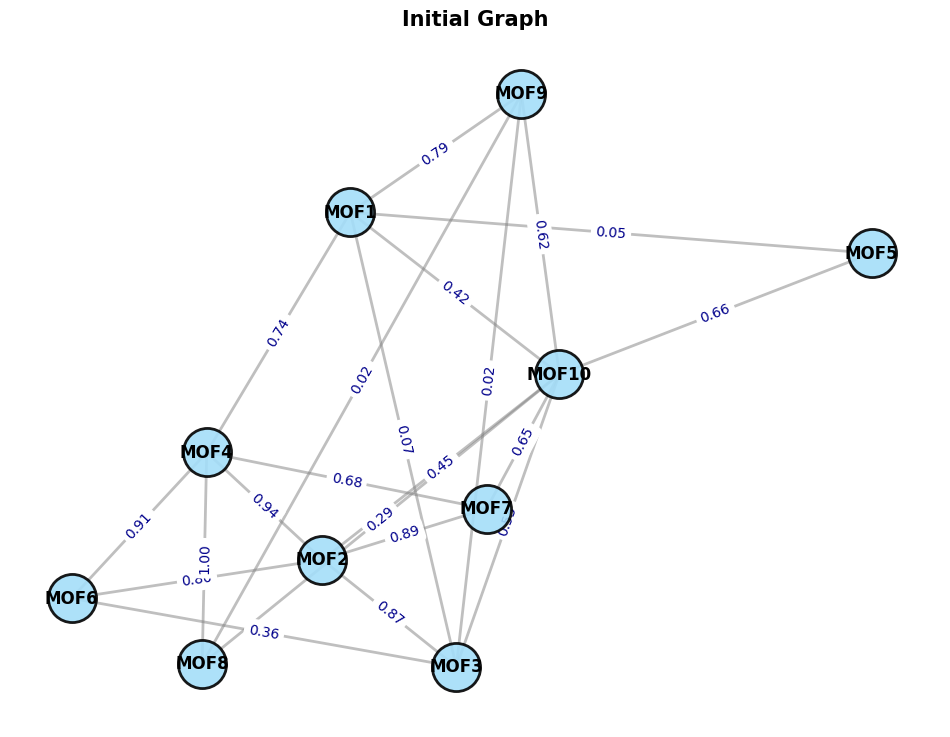

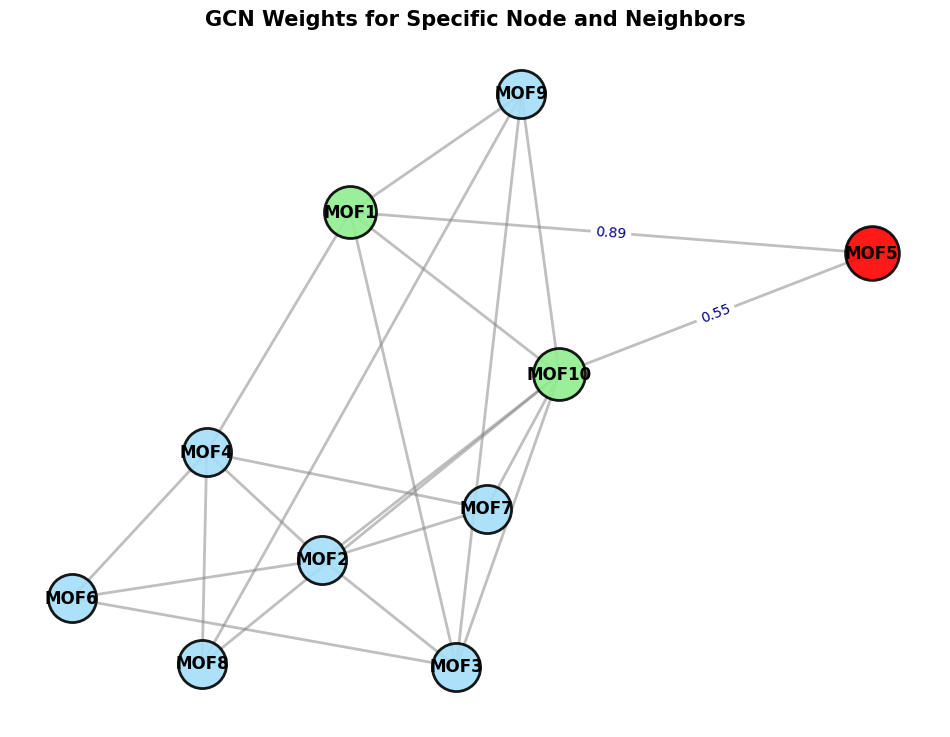

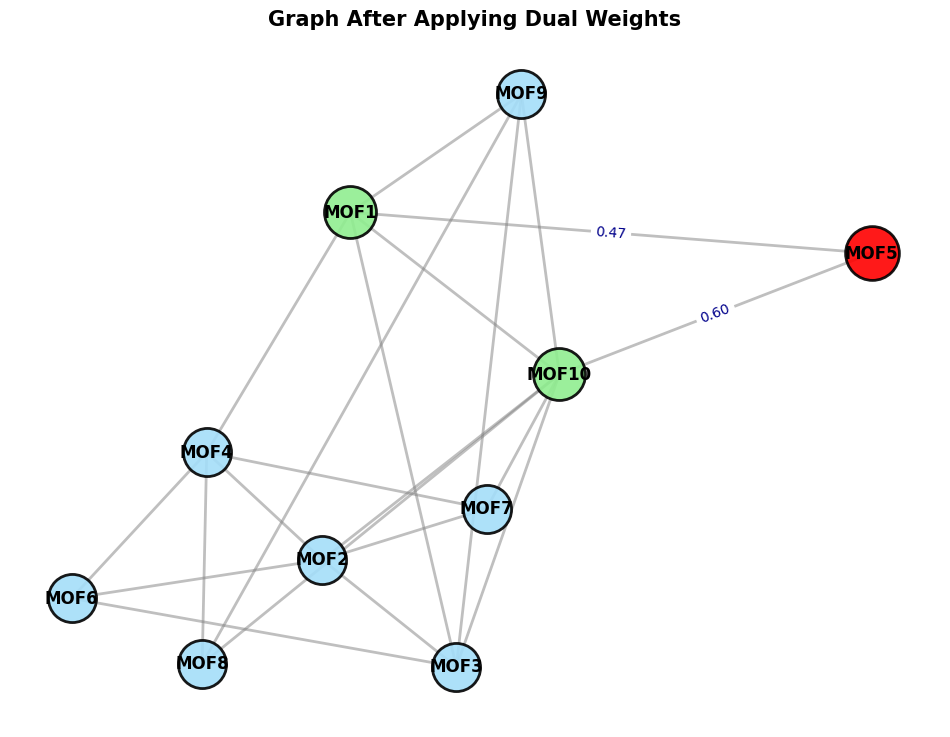

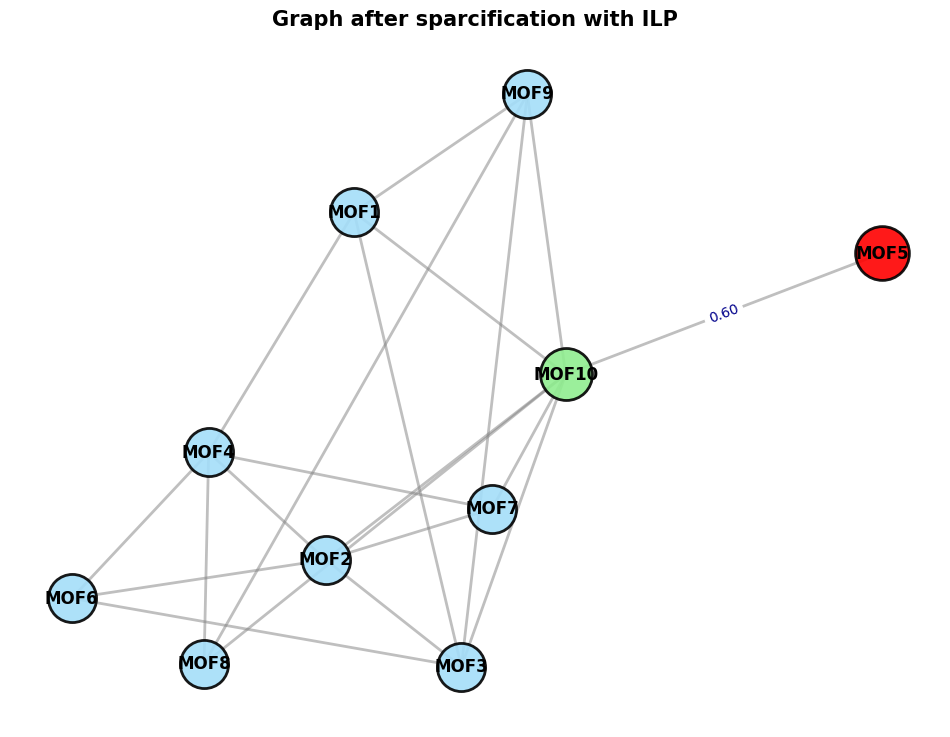

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the graph with curved edges
def plot_graph(G, pos, edge_weights, title, highlight=None, removed_edges=None, display_edges=None):
    plt.figure(figsize=(12, 9))
    # Draw the base graph with attractive nodes
    base_nodes = set(G) - set([highlight]) - set(G.neighbors(highlight)) if highlight else set(G)
    nx.draw_networkx_nodes(G, pos, nodelist=list(base_nodes), node_size=1200,
                           node_color='#a4def9', linewidths=2, edgecolors='black', alpha=0.9)

    # Draw highlighted nodes with a different style
    if highlight:
        nx.draw_networkx_nodes(G, pos, nodelist=[highlight], node_size=1500,
                               node_color='red', linewidths=2, edgecolors='black', alpha=0.9)
        neighbors = list(G.neighbors(highlight))
        nx.draw_networkx_nodes(G, pos, nodelist=neighbors, node_size=1400,
                               node_color='lightgreen', linewidths=2, edgecolors='black', alpha=0.9)

    # Draw curved edges
    for u, v in G.edges():
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, alpha=0.5, edge_color='grey',
                               connectionstyle='arc3,rad=0.2')

    # Draw labels for nodes and edges
    nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes()}, font_size=12, font_weight='bold')

    # If display_edges is specified, filter edge_labels accordingly
    if display_edges:
        edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items() if e in display_edges or (e[1], e[0]) in display_edges}
    else:
        edge_labels = {e: f"{w:.2f}" for e, w in edge_weights.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkblue')

    plt.title(title, size=15, weight='bold')
    plt.axis('off')
    plt.show()

# Your existing graph setup and processing steps follow here...


# Your existing graph setup and processing steps follow here...

# Initialize the graph, compute positions, and follow with the rest of your graph setup and plotting steps...


# Your existing graph setup and processing steps follow here...


# Initialize the graph and positions
G = nx.erdos_renyi_graph(10, 0.5, seed=42)
mapping = {i: f"MOF{i+1}" for i in range(10)}
G = nx.relabel_nodes(G, mapping)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand()  # Initial random weights

pos = nx.spring_layout(G, seed=42)

# Initial graph plot
initial_weights = nx.get_edge_attributes(G, 'weight')
plot_graph(G, pos, initial_weights, "Initial Graph")

# Selected node and mock GCN weights application
specific_node = 'MOF5'
def mock_gcn_score():
    return np.random.rand()

for u, v in G.edges():
    if u == specific_node or v == specific_node:
        G[u][v]['gcn_weight'] = mock_gcn_score()

# Get edges for labeling connected to the specific node
selected_node_edges = [(u, v) for u, v in G.edges() if u == specific_node or v == specific_node]

# GCN weights plot
gcn_weights = {e: G.edges[e]['gcn_weight'] for e in selected_node_edges}
plot_graph(G, pos, gcn_weights, "GCN Weights for Specific Node and Neighbors", highlight=specific_node, display_edges=selected_node_edges)

# Apply dual weighting
gamma = 0.5
for u, v in G.edges():
    initial_weight = G[u][v]['weight']
    gcn_weight = G[u][v].get('gcn_weight', initial_weight)  # Use initial weight if no specific GCN weight assigned
    G[u][v]['dual_weight'] = gamma * initial_weight + (1 - gamma) * gcn_weight

# Dual weights plot
dual_weights = {e: G.edges[e]['dual_weight'] for e in G.edges()}
plot_graph(G, pos, dual_weights, "Graph After Applying Dual Weights", highlight=specific_node, display_edges=selected_node_edges)

# Edge removal based on threshold
threshold = np.median([G.edges[e]['dual_weight'] for e in selected_node_edges])
edges_to_remove = [e for e in selected_node_edges if G.edges[e]['dual_weight'] < threshold]
G.remove_edges_from(edges_to_remove)

# Update selected_node_edges to reflect the current graph state
selected_node_edges = [(u, v) for u, v in G.edges() if u == specific_node or v == specific_node]

# Final plot after selective edge removal
plot_graph(G, pos, dual_weights, "Graph after sparcification with ILP", highlight=specific_node, removed_edges=edges_to_remove, display_edges=selected_node_edges)
